In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

Описания файлов

* sales_train.csv — обучающий набор. Ежедневные исторические данные с января 2013 г. по октябрь 2015 г.
* test.csv — набор тестов. Вам необходимо спрогнозировать продажи этих магазинов и товаров на ноябрь 2015 года.
sample_submission.csv — образец файла отправки в правильном формате.
* items.csv – дополнительная информация о товарах/товарах.
item_categories.csv   — дополнительная информация о категориях товаров.
* shops.csv — дополнительная информация о магазинах.

Поля данных

* ID  — идентификатор, который представляет кортеж (Магазин, Товар) в тестовом наборе.
* shop_id - уникальный идентификатор магазина
* item_id - уникальный идентификатор товара
* item_category_id - уникальный идентификатор категории товара
* item_cnt_day — количество проданных товаров. Вы прогнозируете ежемесячную сумму этой меры.
* item_price — текущая цена предмета
* date  - дата в формате дд/мм/гггг
* date_block_num — последовательный номер месяца, используется для удобства. Январь 2013 г. — 0, февраль 2013 г. — 1,..., октябрь 2015 г. — 33.
* item_name  - название предмета
* shop_name - название магазина
* item_category_name - название категории товара

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GP2/sales_train.csv', header=0, parse_dates=['date'])

<ipython-input-2-efc17c16af9a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('/content/drive/MyDrive/GP2/sales_train.csv', header=0, parse_dates=['date'])


In [ ]:
shops = pd.read_csv('/content/drive/MyDrive/GP2/shops.csv', header=0)
items = pd.read_csv('/content/drive/MyDrive/GP2/items.csv', header=0)
item_categories = pd.read_csv('/content/drive/MyDrive/GP2/item_categories.csv', header=0)
test = pd.read_csv('/content/drive/MyDrive/GP2/test.csv', header=0)

In [ ]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-09-10,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
df = data.merge(shops, on='shop_id')

In [ ]:
df = df.merge(items, on='item_id')

In [ ]:
df = df.merge(item_categories, on='item_category_id')

In [ ]:
df['shop_id'] = df['shop_id'].replace(0, 57)
df['shop_id'] = df['shop_id'].replace(1, 58)
df['shop_name'] = df['shop_name'].replace('!Якутск Орджоникидзе, 56 фран', 'Якутск Орджоникидзе, 56')
df['shop_name'] = df['shop_name'].replace('!Якутск ТЦ "Центральный" фран', 'Якутск ТЦ "Центральный"')

In [ ]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13093,250.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,2015-09-21,32,55,13091,1000.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,2015-09-16,32,55,13094,2500.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,2015-09-22,32,55,13094,2500.0,2.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   item_name           object        
 8   item_category_id    int64         
 9   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


In [ ]:
df[['item_price',  'item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


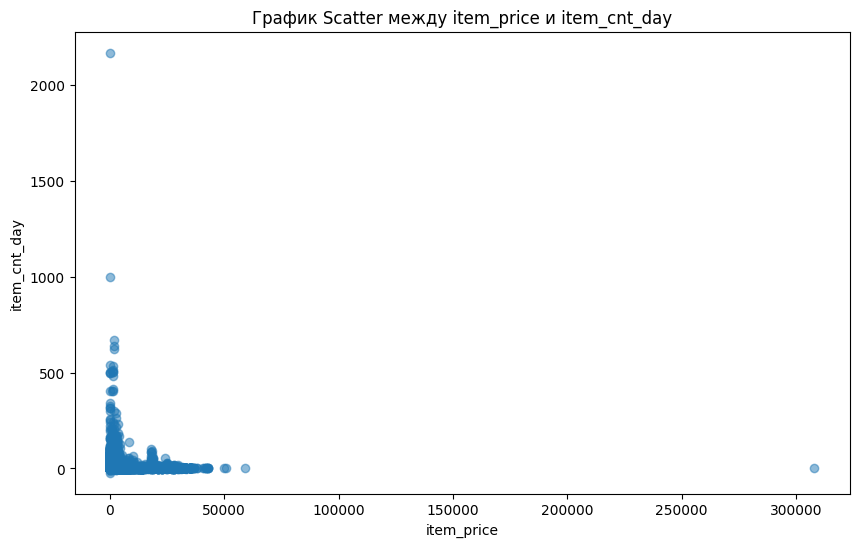

In [ ]:
# Постройте scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df['item_price'], df['item_cnt_day'], alpha=0.5)
plt.title('График Scatter между item_price и item_cnt_day')
plt.xlabel('item_price')
plt.ylabel('item_cnt_day')
plt.show()

In [ ]:
df[df['item_price'] > 300000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2105022,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса


In [ ]:
df[df['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2105022,2013-12-13,11,12,6066,307980.0,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса


In [ ]:
#Уникальные значения, в которых item_name содержит "Radmin".
df[df['item_name'].str.contains('Radmin', case=False)]['item_name'].unique()

array(['Radmin 3  - 1 лиц.', 'Radmin 3  - 522 лиц.'], dtype=object)

In [ ]:
df[df['shop_id'] == 12]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
302,2014-01-10,21,12,8095,499.000000,1.0,Интернет-магазин ЧС,АВАТАР (BD+DVD),37,Кино - Blu-Ray
303,2015-09-02,25,12,8095,312.000000,1.0,Интернет-магазин ЧС,АВАТАР (BD+DVD),37,Кино - Blu-Ray
304,2015-04-15,27,12,8095,398.000000,1.0,Интернет-магазин ЧС,АВАТАР (BD+DVD),37,Кино - Blu-Ray
632,2013-10-21,9,12,8266,299.000000,1.0,Интернет-магазин ЧС,АМЕРИКАНСКИЙ ПИРОГ. ВСЕ В СБОРЕ (BD),37,Кино - Blu-Ray
633,2014-07-24,18,12,8266,299.000000,1.0,Интернет-магазин ЧС,АМЕРИКАНСКИЙ ПИРОГ. ВСЕ В СБОРЕ (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2901584,2015-10-23,33,12,11371,228.333333,6.0,Интернет-магазин ЧС,Доставка Альтернативная (по Москве),9,Доставка товара
2901585,2015-10-26,33,12,11371,350.000000,1.0,Интернет-магазин ЧС,Доставка Альтернативная (по Москве),9,Доставка товара
2901586,2015-10-27,33,12,11371,250.000000,4.0,Интернет-магазин ЧС,Доставка Альтернативная (по Москве),9,Доставка товара
2901587,2015-10-28,33,12,11371,1010.000000,1.0,Интернет-магазин ЧС,Доставка Альтернативная (по Москве),9,Доставка товара


In [ ]:
df[df['item_cnt_day'] > 750]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2717299,2015-01-15,24,12,20949,4.000000,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши"
2900512,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


In [ ]:
df[(df['item_cnt_day'] < 0) & (df['shop_id'] == 12)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
23939,2013-04-04,3,12,14575,599.0,-1.0,Интернет-магазин ЧС,МЕТРО (BD),37,Кино - Blu-Ray
35018,2015-03-08,31,12,19634,299.0,-1.0,Интернет-магазин ЧС,ТЕМНЫЙ РЫЦАРЬ WB (BD),37,Кино - Blu-Ray
63736,2015-07-21,30,12,19776,149.0,-1.0,Интернет-магазин ЧС,ТРАНСФОРМЕРЫ (BD),37,Кино - Blu-Ray
130531,2015-02-27,25,12,12593,249.0,-1.0,Интернет-магазин ЧС,КЛЮЧ ОТ ВСЕХ ДВЕРЕЙ (BD),37,Кино - Blu-Ray
155722,2015-09-24,32,12,12021,749.0,-1.0,Интернет-магазин ЧС,ИНТЕРСТЕЛЛАР (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2901161,2013-08-28,7,12,11368,250.0,-1.0,Интернет-магазин ЧС,Доставка (Курьер),9,Доставка товара
2901164,2014-08-19,19,12,11368,500.0,-1.0,Интернет-магазин ЧС,Доставка (Курьер),9,Доставка товара
2901172,2014-12-08,19,12,11367,250.0,-1.0,Интернет-магазин ЧС,Доставка (Клео-Логистик),9,Доставка товара
2901173,2014-07-08,19,12,11367,375.0,-2.0,Интернет-магазин ЧС,Доставка (Клео-Логистик),9,Доставка товара


In [ ]:
# Список индексов для удаления.
indices_to_remove = [2105022, 2717299, 2900512]

# Создайте новый датафрейм с удаленными строками.
removed_rows_df = df.loc[indices_to_remove]

# Удалите строки с указанными индексами из исходного датафрейма.
df.drop(indices_to_remove, inplace=True)

removed_rows_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2105022,2013-12-13,11,12,6066,307980.000000,1.0,Интернет-магазин ЧС,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса
2717299,2015-01-15,24,12,20949,4.000000,1000.0,Интернет-магазин ЧС,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши"
2900512,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


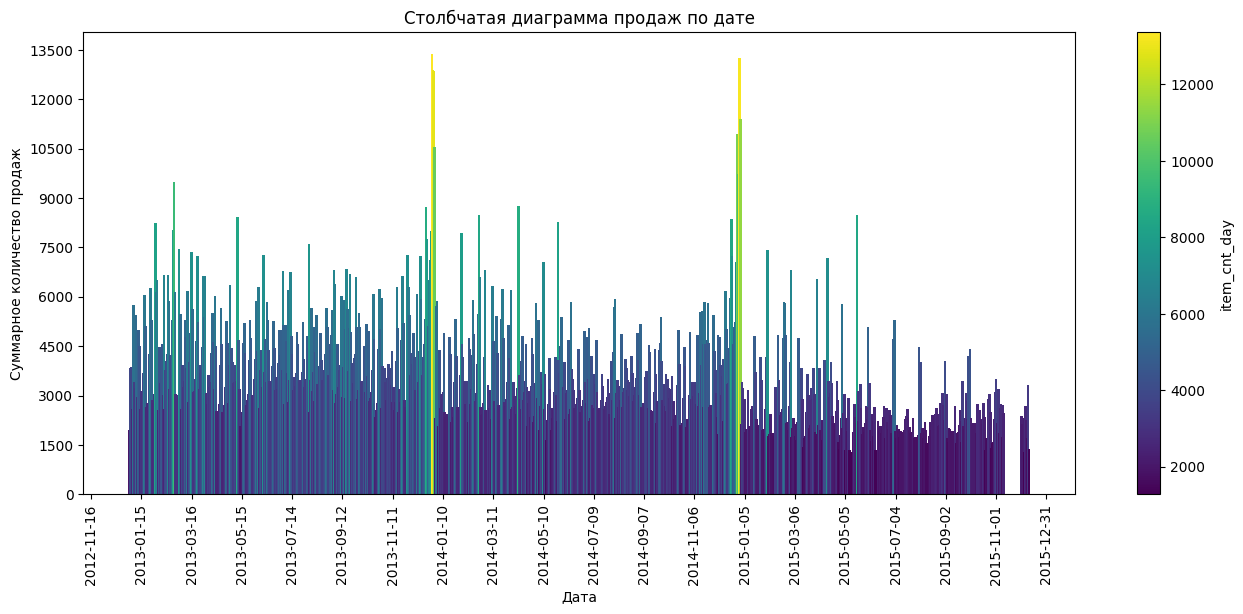

In [ ]:
# Преобразование столбца 'date' в формат datetime.
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Отфильтровать строки с положительными значениями item_cnt_day.
filtered_data = df[df['item_cnt_day'] >= 0]

# Группировка данных после фильтрации по дате и суммирование количества продаж для каждой даты.
date_sales = filtered_data.groupby('date')['item_cnt_day'].sum().reset_index()

# Задайте цветовую карту (colormap) и нормализацию.
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=date_sales['item_cnt_day'].min(), vmax=date_sales['item_cnt_day'].max())

# Создайте объект ScalarMappable для цветовой шкалы.
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Создайте объект ScalarMappable для цветовой шкалы.
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Постройте столбчатую диаграмму.
plt.figure(figsize=(16, 6))
plt.bar(date_sales['date'], date_sales['item_cnt_day'], width=3, align='center', color=cmap(norm(date_sales['item_cnt_day'])))
plt.title('Столбчатая диаграмма продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество продаж')

# Добавьте цветовую шкалу.
plt.colorbar(sm, ax=plt.gca(), label='item_cnt_day')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Задаем максимальное количество делений на оси X
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Задаем максимальное количество делений на оси Y
plt.xticks(rotation=90)
plt.show()

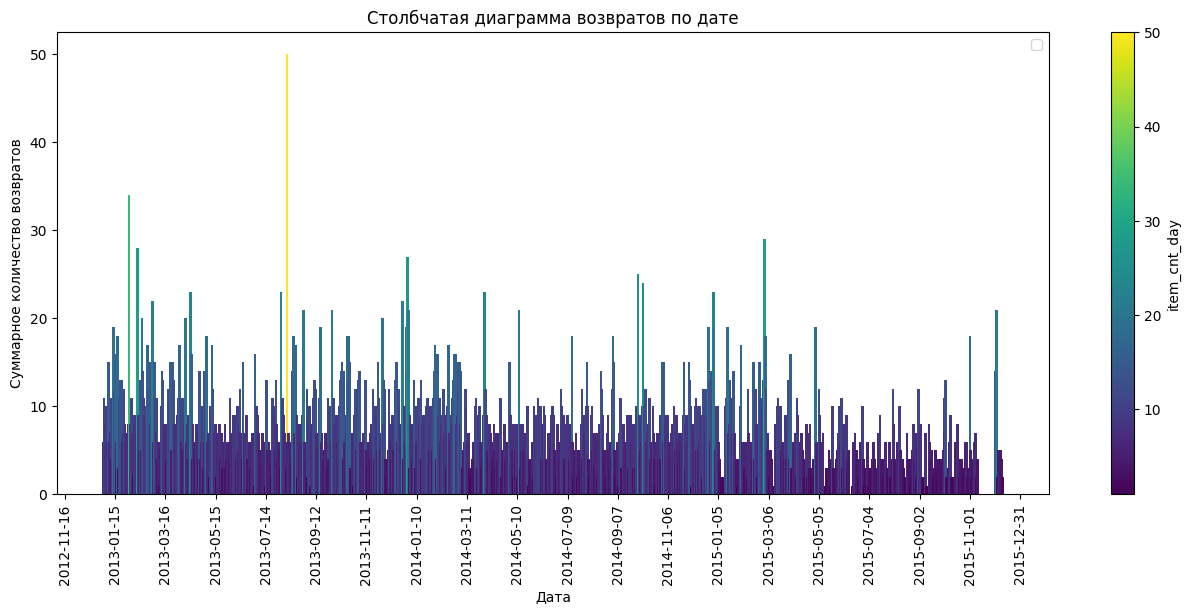

In [ ]:
# Отфильтровать строки с отрицательными значениями item_cnt_day.
negative_data = df[df['item_cnt_day'] < 0]


negative_sales = abs(negative_data.groupby('date')['item_cnt_day'].sum()).reset_index()

# Задайте цветовую карту (colormap) и нормализацию.
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=negative_sales['item_cnt_day'].min(), vmax=(negative_sales['item_cnt_day'].max()))

# Создайте объект ScalarMappable для цветовой шкалы.
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Создайте объект ScalarMappable для цветовой шкалы.
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Постройте столбчатую диаграмму для отрицательных значений.
plt.figure(figsize=(16, 6))
plt.bar(negative_sales['date'], abs(negative_sales['item_cnt_day']), width=3, align='center', color=cmap(norm(negative_sales['item_cnt_day'])))
plt.title('Столбчатая диаграмма возвратов по дате')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество возвратов')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Задаем максимальное количество делений на оси X
# Добавьте цветовую шкалу.
plt.colorbar(sm, ax=plt.gca(), label='item_cnt_day')
plt.legend()
plt.show()

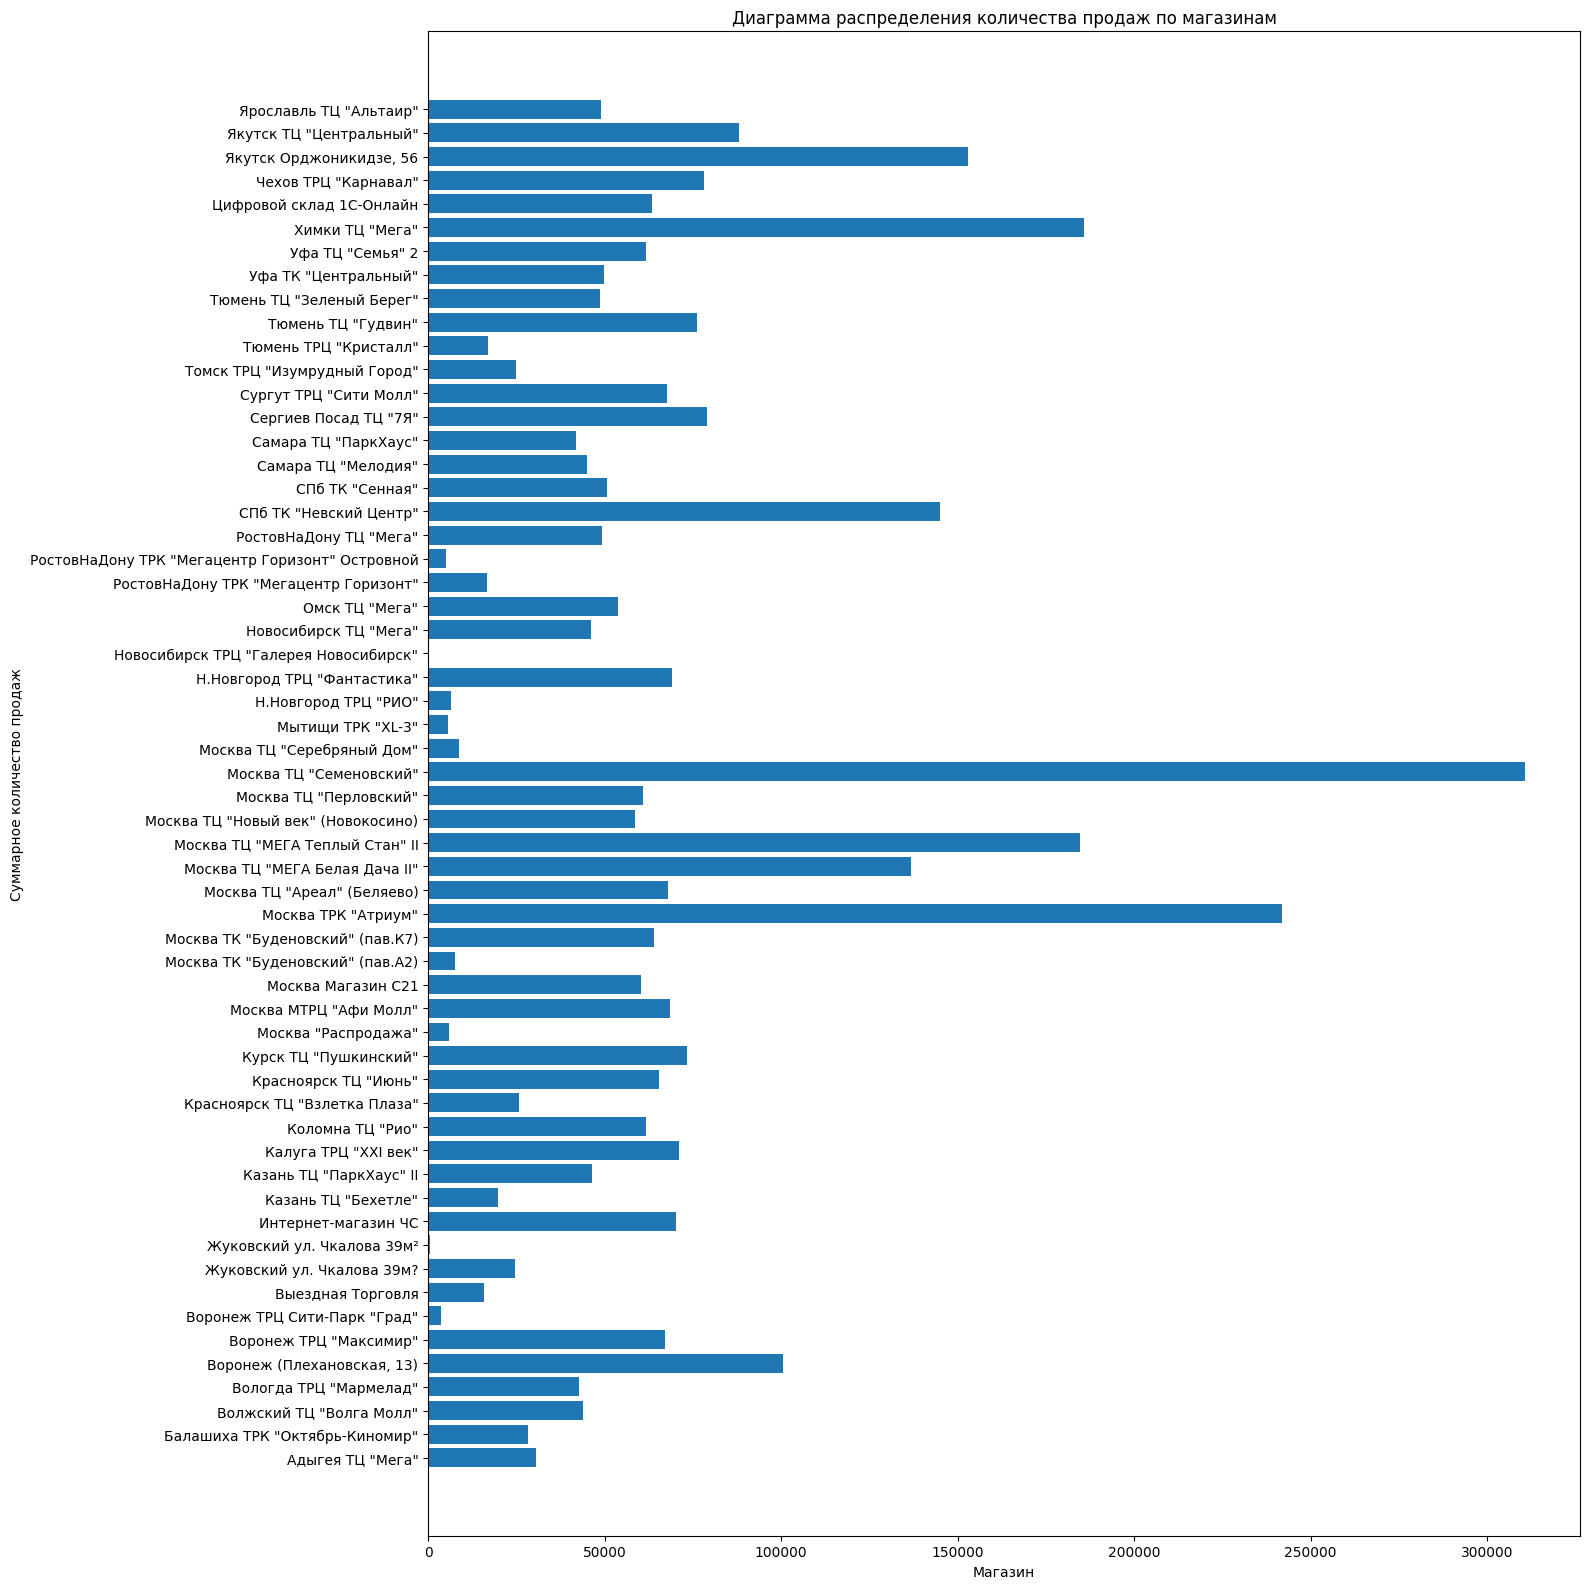

In [ ]:
# Группировка данных по магазинам и суммирование количества продаж для каждого магазина.
shop_sales = df.groupby('shop_name')['item_cnt_day'].sum().reset_index()

# Постройте столбчатую диаграмму.
plt.figure(figsize=(16, 16))
plt.barh( shop_sales['shop_name'],shop_sales['item_cnt_day'],  align='center')
plt.title('Диаграмма распределения количества продаж по магазинам')
plt.xlabel('Магазин')
plt.ylabel('Суммарное количество продаж')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

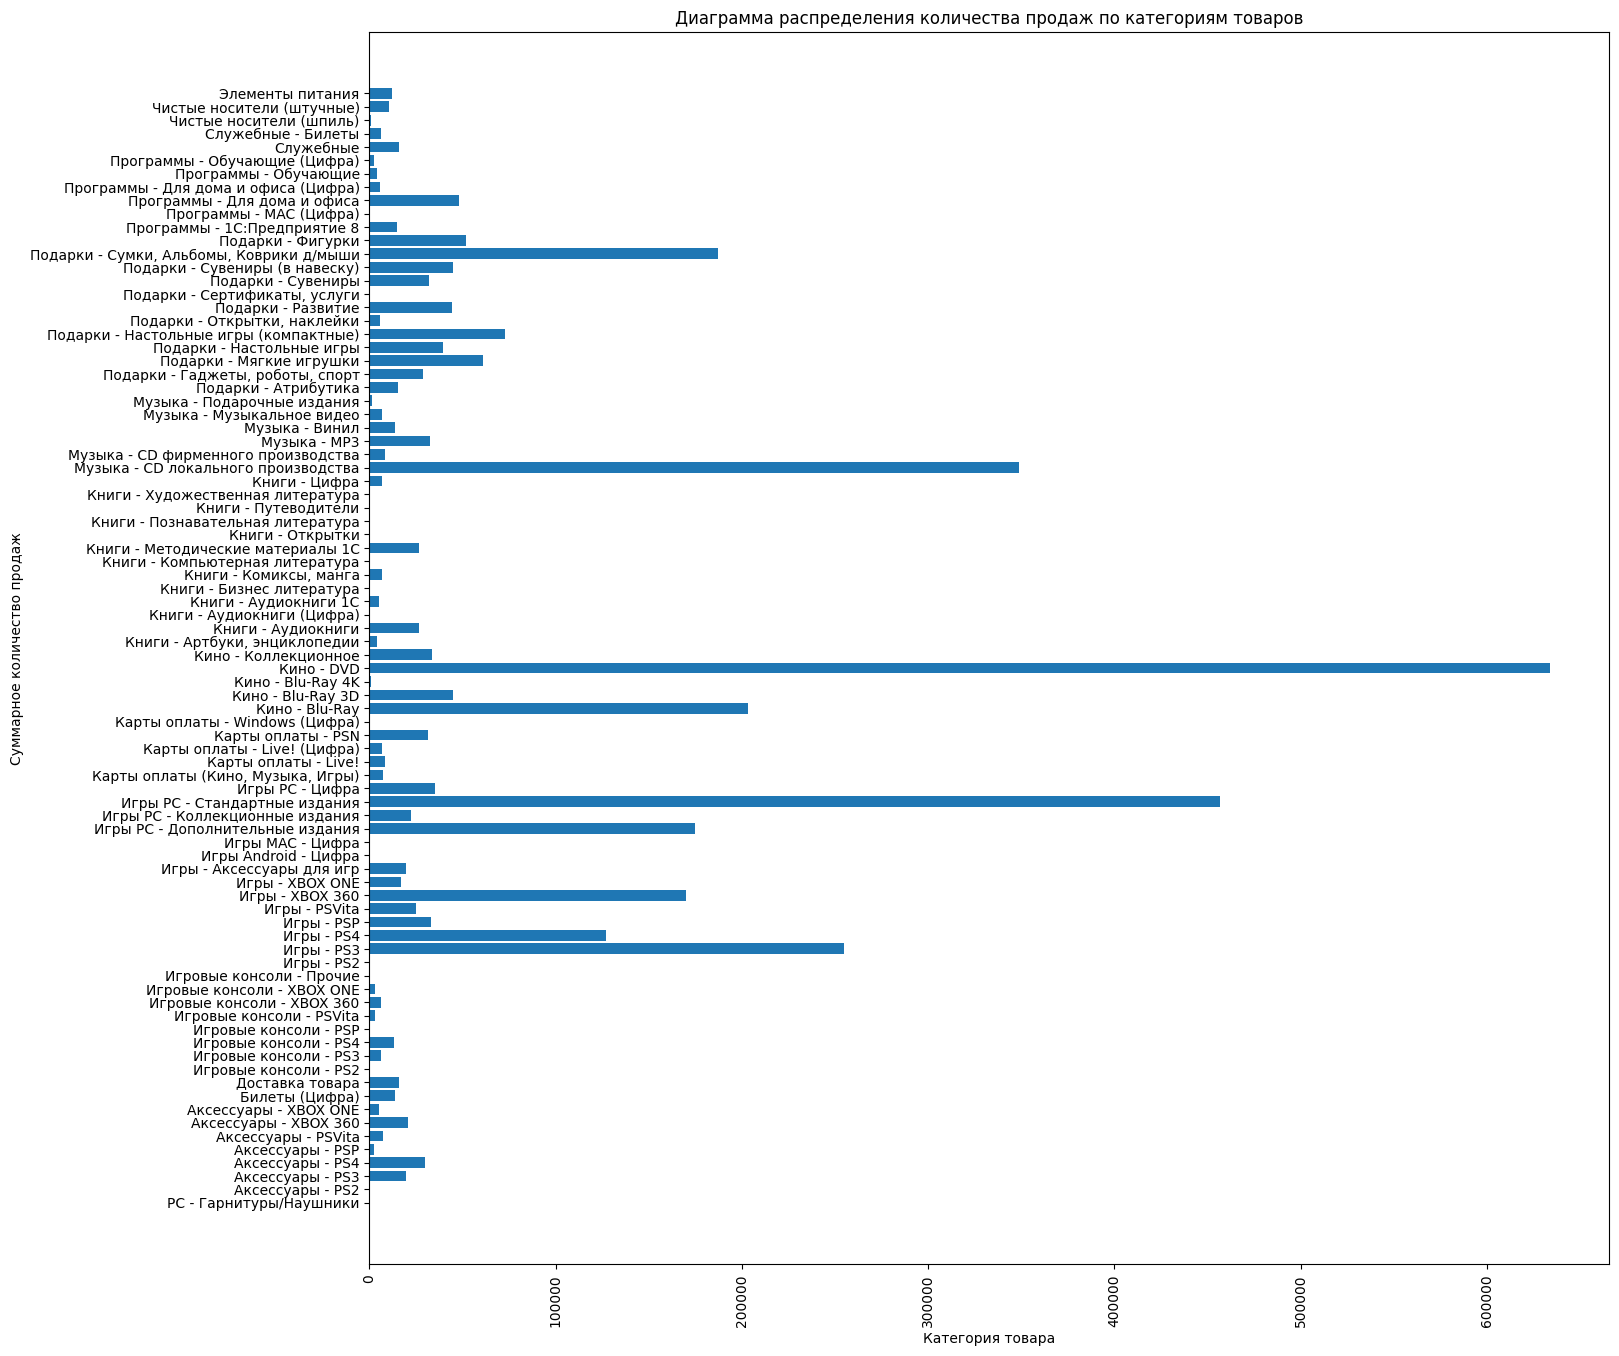

In [ ]:
# Группировка данных по категориям товаров и суммирование количества продаж для каждой категории.
category_sales = df.groupby('item_category_name')['item_cnt_day'].sum().reset_index()

# Постройте столбчатую диаграмму.
plt.figure(figsize=(16, 16))
plt.barh(category_sales['item_category_name'], category_sales['item_cnt_day'], align='center')
plt.title('Диаграмма распределения количества продаж по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Суммарное количество продаж')
plt.xticks(rotation=90)

plt.show()

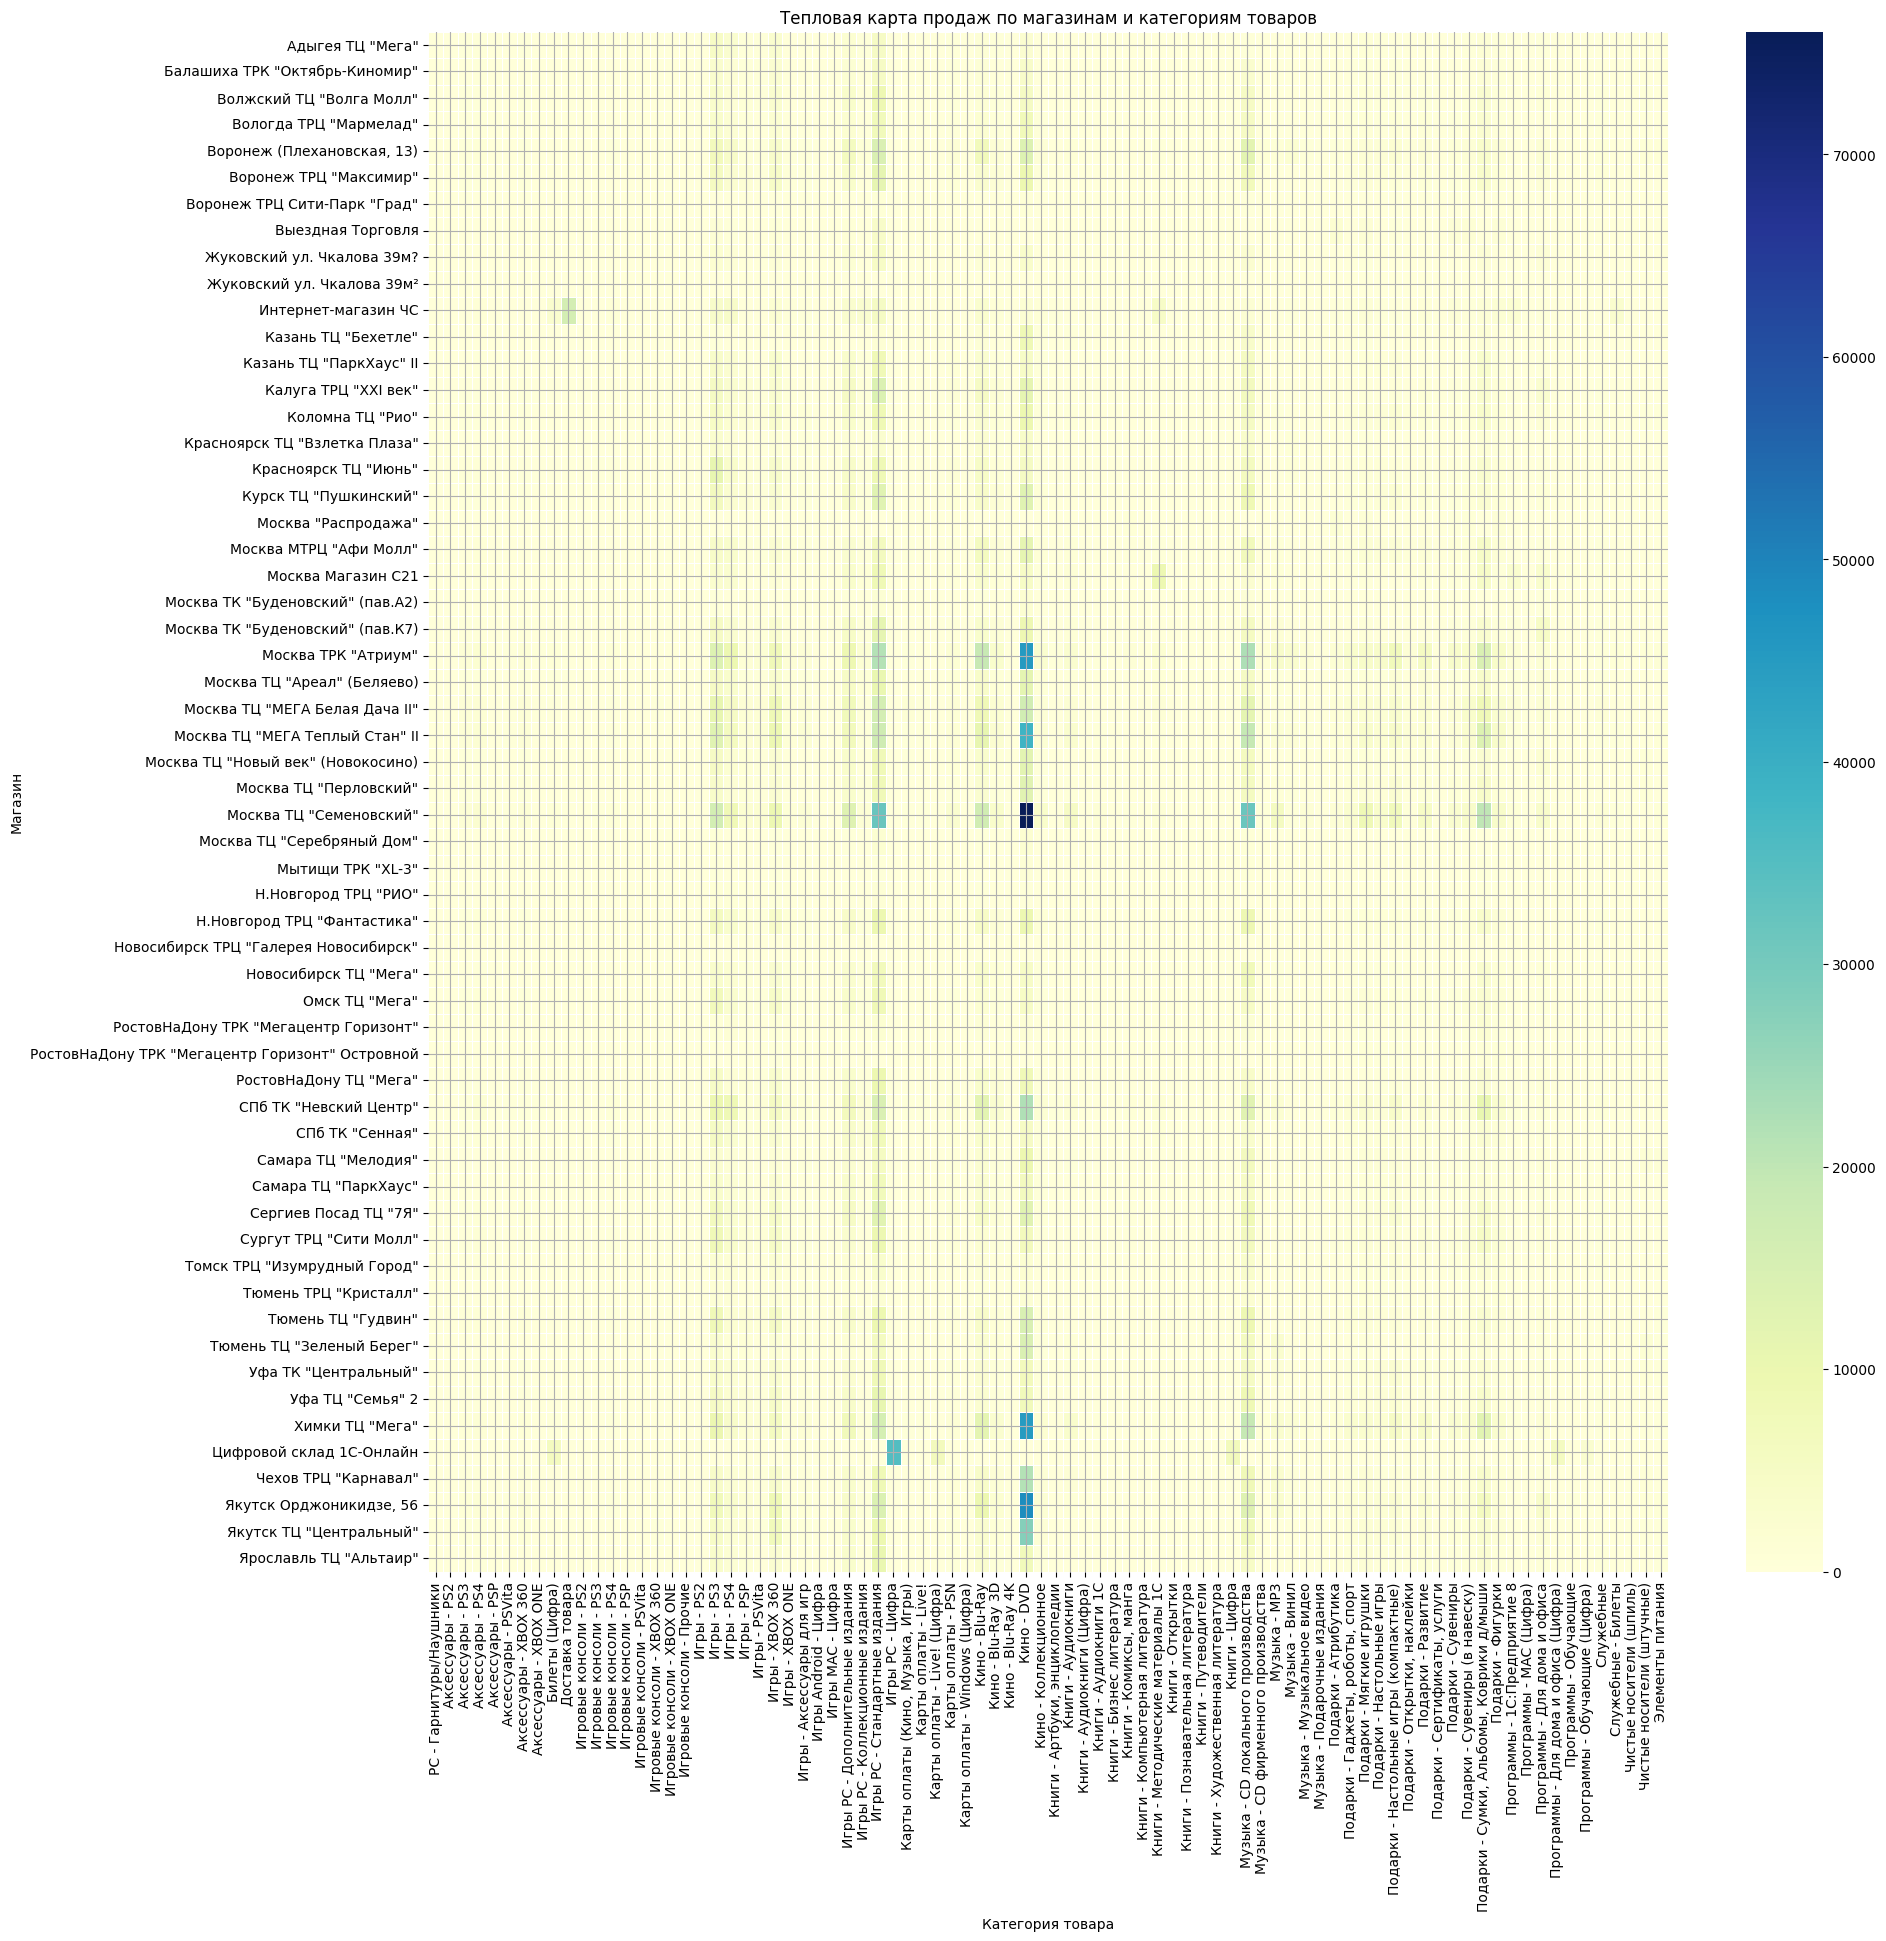

In [ ]:
# Группировка данных по магазинам, категориям и суммирование количества продаж.
heatmap_data = df.groupby(['shop_name', 'item_category_name'])['item_cnt_day'].sum().unstack(fill_value=0)

# Постройте тепловую карту.
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Тепловая карта продаж по магазинам и категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Магазин')
plt.grid()
plt.show()

In [ ]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13093,250.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,2015-09-21,32,55,13091,1000.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,2015-09-16,32,55,13094,2500.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,2015-09-22,32,55,13094,2500.0,2.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [ ]:
df['city'] = df['shop_name'].str.split(' ', 1).str[0]

<ipython-input-30-fecd4577107b>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['city'] = df['shop_name'].str.split(' ', 1).str[0]


In [ ]:
df['category'] = df['item_category_name'].str.split(' - ', 1).str[0]

<ipython-input-31-840cccc88404>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['category'] = df['item_category_name'].str.split(' - ', 1).str[0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['date_encoded'] = label_encoder.fit_transform(df['date'])

In [ ]:
df.drop(['shop_name', 'city', 'date', 'item_category_name' , 'category' , 'date', 'item_name'], axis=1, inplace=True)

In [ ]:
df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,city_encoded,category_encoded,date_encoded
0,0,59,22154,999.0,1.0,37,30,11,31
1,0,25,22154,999.0,1.0,37,13,11,31
2,0,25,22154,999.0,1.0,37,13,11,59
3,0,25,22154,999.0,1.0,37,13,11,19
4,0,25,22154,999.0,1.0,37,13,11,22
...,...,...,...,...,...,...,...,...,...
2935844,33,55,13093,250.0,1.0,36,27,9,1004
2935845,32,55,13091,1000.0,1.0,36,27,9,975
2935846,32,55,13094,2500.0,1.0,36,27,9,970
2935847,32,55,13094,2500.0,2.0,36,27,9,976


In [ ]:
%time
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(['item_cnt_day'], axis=1)
y = df['item_cnt_day']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

# Создание и обучение модели XGBoost
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

In [ ]:
# Оценка модели
print(f"MAE:       {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred)}")
print(f"R2:        {r2_score(y_test, y_pred)}")

MAE:       0.3203052298116112
MSE:       3.1675618434174853
MAPE:      0.194662939506722
MAX_ERROR: 526.7877349853516
R2:        0.33494061024810373


In [ ]:
%time
import lightgbm as lgb

# Создание объекта модели LightGBM
model = lgb.LGBMRegressor()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.277363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 2201884, number of used features: 8
[LightGBM] [Info] Start training from score 1.242565


In [ ]:
# Оценка модели
print(f"MAE:       {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred)}")
print(f"R2:        {r2_score(y_test, y_pred)}")

MAE:       0.33300071888829796
MSE:       3.58282815702287
MAPE:      0.19821400786493157
MAX_ERROR: 590.86839968252
R2:        0.24775154346323902


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

In [ ]:
model = lgb.LGBMRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

In [ ]:
%time
grid_search.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.158050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 1761507, number of used features: 8
[LightGBM] [Info] Start training from score 1.241944
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 1761507, number of used features: 8
[LightGBM] [Info] Start training from score 1.242861
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.143229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the t

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 150],
                         'num_leaves': [31, 50, 100]},
             scoring='r2')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('Best Parameters:', best_params)
print('Best Model:', best_model)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 150, 'num_leaves': 100}
Best Model: LGBMRegressor(learning_rate=0.2, n_estimators=150, num_leaves=100)


In [ ]:
# Создание модели с лучшими параметрами
best_model = lgb.LGBMRegressor(learning_rate=0.2, n_estimators=150, num_leaves=100)

# Обучение модели на всех данных
best_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = best_model.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.268447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 2201884, number of used features: 8
[LightGBM] [Info] Start training from score 1.242565


In [ ]:
# Оценка модели
print(f"MAE:       {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred)}")
print(f"R2:        {r2_score(y_test, y_pred)}")

MAE:       0.3018040239686505
MSE:       3.179947558207333
MAPE:      0.17700441236373737
MAX_ERROR: 550.6815692642812
R2:        0.33234011298018307


In [ ]:
%time
from sklearn.ensemble import RandomForestRegressor
# Создание модели
rf_model = RandomForestRegressor(random_state=3)

# Обучение модели
rf_model.fit(X_train, y_train)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


RandomForestRegressor(random_state=3)

In [ ]:
# Прогноз на тестовом наборе
y_pred = rf_model.predict(X_test)

# Оценка модели
print(f"MAE:       {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred)}")
print(f"R2:        {r2_score(y_test, y_pred)}")

MAE:       0.27998315989111155
MSE:       2.8038011305762427
MAPE:      0.1635825178264564
MAX_ERROR: 466.36
R2:        0.4113155919080991


In [ ]:
# Получение важности признаков из модели Random Forest
feature_importances = rf_model.feature_importances_

# Создание DataFrame для удобства отображения
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Сортировка по убыванию важности
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print(importances_df)

            Feature  Importance
7      date_encoded    0.343806
3        item_price    0.267773
1           shop_id    0.150245
2           item_id    0.082705
5      city_encoded    0.071452
0    date_block_num    0.066413
4  item_category_id    0.013966
6  category_encoded    0.003641


In [ ]:
%time
from sklearn.linear_model import ElasticNet

# Создание модели
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=3)

# Обучение модели
elasticnet_model.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


ElasticNet(random_state=3)

In [ ]:
# Прогноз на тестовом наборе
y_pred = elasticnet_model.predict(X_test)

# Оценка модели
print(f"MAE:       {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred)}")
print(f"R2:        {r2_score(y_test, y_pred)}")

MAE:       0.4409995710235215
MSE:       4.75957277136705
MAPE:      0.27213883831639074
MAX_ERROR: 667.7282969424392
R2:        0.0006829481851693409


In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
%time
# Создание модели Ridge
ridge_model = Ridge(alpha=.01, random_state=3)

# Обучение модели Ridge
ridge_model.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Ridge(alpha=0.01, random_state=3)

In [ ]:
%time
# Создание модели Lasso
lasso_model = Lasso(alpha=3, random_state=3)

# Обучение модели Lasso
lasso_model.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


Lasso(alpha=3, random_state=3)

In [ ]:
# Прогнозы для модели Ridge
y_pred_ridge = ridge_model.predict(X_test)

# Прогнозы для модели Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Прогнозы для модели Ridge
print('Модель Ridge')
print(f"MAE:       {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred_ridge)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred_ridge)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred_ridge)}")
print(f"R2:        {r2_score(y_test, y_pred_ridge)}")
print('')

# Оценка модели Lasso
print('Модель Lasso')
print(f"MAE:       {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE:       {mean_squared_error(y_test, y_pred_lasso)}")
print(f"MAPE:      {mean_absolute_percentage_error(y_test, y_pred_lasso)}")
print(f"MAX_ERROR: {max_error(y_test, y_pred_lasso)}")
print(f"R2:        {r2_score(y_test, y_pred_lasso)}")

Модель Ridge
MAE:       0.4360715908362364
MSE:       4.738580111748127
MAPE:      0.270096524174275
MAX_ERROR: 667.494410626859
R2:        0.005090554440574602

Модель Lasso
MAE:       0.4410213549890322
MSE:       4.759681084908512
MAPE:      0.2721554722123996
MAX_ERROR: 667.7464746394369
R2:        0.000660206738798963
